# REDE NEURAL ARTIFICIAL

## Capítulo 1 - Backpropagation: uma abordagem matemática

In [40]:
from IPython.display import Image
import numpy as np
import pandas as pd
import math

O exemplo abordado pode ser representado pela imagem abaixo. 

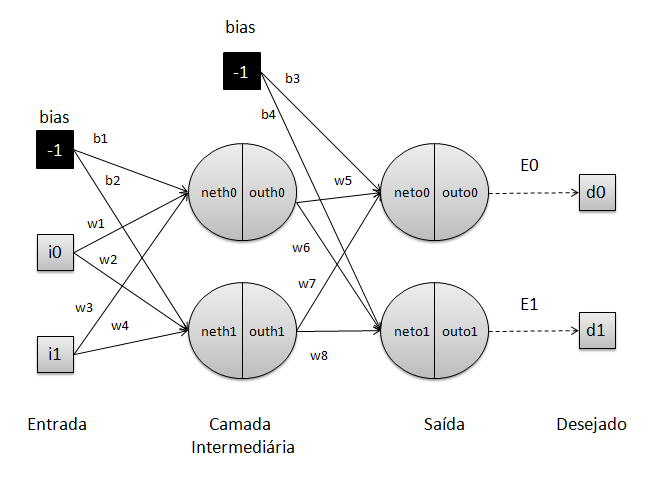

In [2]:
Image(filename="Capturar1.png")

Os passos são:
1. Forward
2. Cálculo do erro 
3. Backward

### 1. Forward

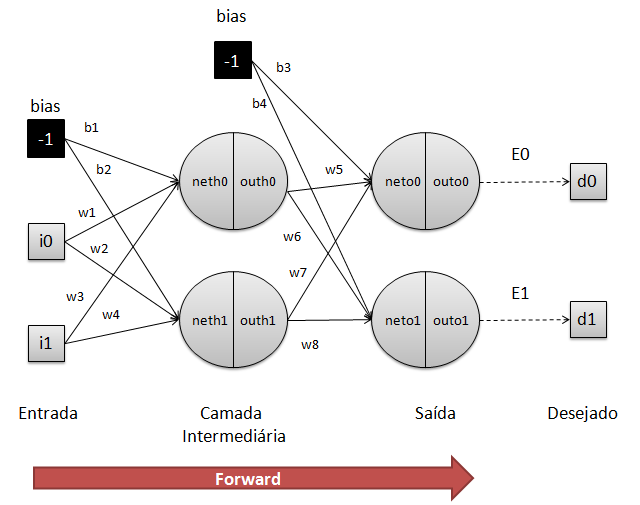

In [3]:
Image(filename="Capturar2.png")

#### 1.1 Determinar os pesos e as saídas dos neurônios na camada intermediária. 

\begin{equation*}
\mathbf{Input} = \begin{vmatrix}
\ bias \\
\ i0 \\ 
\ i1 \\ 
\end{vmatrix} 
\end{equation*}

Abaixo determine os valores do vetor **Input**.

In [78]:
# Determinar o valor de Input
bias=1               # Valor bias
i0=0.05               # Entrada i0
i1=0.10               # Entrada i1

Input=pd.DataFrame([bias,i0,i1])
print('\nO vetor Input é:')
Input


O vetor Input é:


,0
0,1.00
1,0.05
2,0.10


\begin{equation*}
\mathbf{W^1} = \begin{vmatrix}
\ b1 & w1 & w3 \\
\ b2 & w2 & w4 \\ 
\end{vmatrix} 
\end{equation*}

Abaixo determine os valores dos vetor de pesos **W1**.

In [81]:
# Determinar valor de W1
b1,b2=0.35,0.35                               # Peso do bias
w1,w2,w3,w4=0.15,0.25,0.20,0.30               # Peso das entradas

W1=pd.DataFrame([[b1,w1,w3],[b2,w2,w4]])
print('\n A matriz peso W1 é:')
W1    


 A matriz peso W1 é:


,0,1,2
0,0.35,0.15,0.2
1,0.35,0.25,0.3


\begin{equation*}
\mathbf{neth}=\mathbf{W^1} \times \mathbf{Input} 
\end{equation*}

\begin{equation*}
\mathbf{neth} =  \begin{vmatrix}
\ b1 & w1 & w3\\
\ b2 & w2 & w4 \\
\end{vmatrix} \times \begin{vmatrix}
\ bias\\
\ i0\\
\ i1 \\
\end{vmatrix}=\begin{vmatrix}
\ b1.bias+w1.i0+w3.i1 \\
\ b2.bias+w2.i0+w4.i1\\
\end{vmatrix} 
\end{equation*}

\begin{equation*}
\mathbf{neth}= \begin{vmatrix}
\ neth0\\
\ neth1 \\
\end{vmatrix} 
\end{equation*}

O valor de **neth** é dado abaixo.

In [82]:
valor=np.dot(W1,Input)
neth=pd.DataFrame(valor)
neth

,0
0,0.3775
1,0.3925


A função  de ativação do neurônio é uma sigmóide definida por:

\begin{equation*}
\mathbf{f(x)}=\frac{1}{1+e^{-x}}
\end{equation*}

E sua derivada primeira por:

\begin{equation*}
\mathbf{f'(x)}=f(x).(1-f(x))
\end{equation*}

Então,

\begin{equation*}
\mathbf{outh}=f(\mathbf{neth}) = \begin{vmatrix}
\ outh0\\
\ outh1 \\
\end{vmatrix} 
\end{equation*}

O valor de **outh** é dado abaixo.

In [83]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

outh=neth.apply(sigmoid)
outh

,0
0,0.593270
1,0.596884


Porém tem um bias na camada intermediária, portanto:

\begin{equation*}
\mathbf{outh}=\begin{vmatrix}
\ bias\\
\ outh0\\
\ outh1 \\
\end{vmatrix} 
\end{equation*}

O valor de **outh** é dado abaixo.

In [84]:
b=pd.Series(bias)
outh=pd.concat([b,outh],ignore_index=True)
outh

,0
0,1.000000
1,0.593270
2,0.596884


#### 1.2 Determinar os pesos e as saídas dos neurônios na camada de saída. 

\begin{equation*}
\mathbf{W^2} = \begin{vmatrix}
\ b3 & w5 & w7 \\
\ b4 &  w6 & w8 \\ 
\end{vmatrix} 
\end{equation*}

Abaixo determine os valores dos vetor de pesos **W2**.

In [85]:
# Determinar valor de W2
b3,b4=0.60,0.60                                 # Pesos dos bias
w5,w6,w7,w8=0.40,0.50,0.45,0.55                 # Peso das saídas da primeira camada
   
W2=pd.DataFrame([[b3,w5,w7],[b4,w6,w8]])
print('\n A matriz peso W2 é:')
W2    


 A matriz peso W2 é:


,0,1,2
0,0.6,0.4,0.45
1,0.6,0.5,0.55


\begin{equation*}
\mathbf{neto}=\mathbf{W^2} \times \mathbf{outh} 
\end{equation*}

\begin{equation*}
\mathbf{neto}=\begin{vmatrix}
\ b3 & w5 & w7 \\
\ b4 &  w6 & w8 \\ 
\end{vmatrix} \times \begin{vmatrix}
\ bias\\
\ outh0\\
\ outh1 \\
\end{vmatrix} =\begin{vmatrix}
\ b3.bias+w5.outh0+w7.outh1 \\
\ b4.bias+w6.outh0+w4.outh1\\
\end{vmatrix}
\end{equation*}

\begin{equation*}
\mathbf{neto}= \begin{vmatrix}
\ neto0\\
\ neto1 \\
\end{vmatrix} 
\end{equation*}

O valor de **neto** é dado abaixo.

In [86]:
valor=np.dot(W2,outh)
neto=pd.DataFrame(valor)
neto

,0
0,1.105906
1,1.224921


\begin{equation*}
\mathbf{outo}=f(\mathbf{neto}) = \begin{vmatrix}
\ outo0\\
\ outo1 \\
\end{vmatrix} 
\end{equation*}

O valor de **outo** é dado abaixo.

In [87]:
outo=neto.apply(sigmoid)
outo

,0
0,0.751365
1,0.772928


### 2. Cálculo do erro

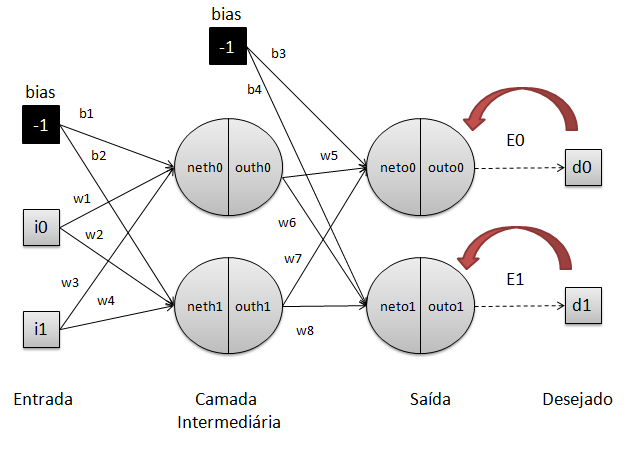

In [7]:
Image(filename="Capturar3.png")

Para ele utiliza-se o erro quadrático, dado por:

\begin{equation*}
\mathbf{E}=\sum_{k=1}^n \frac{1}{2} (\mathbf{d_k}-\mathbf{outo_k})^2 = E0 + E1= \frac{1}{2}(d0-outo0)^2 + \frac{1}{2}(d1-outo1)^2
\end{equation*}

Matricialmente, o erro é dado por:

\begin{equation*}
\mathbf{E}=\begin{vmatrix}
\ E0\\
\ E1\\
\end{vmatrix}
\end{equation*}


Sendo o desejado,

\begin{equation*}
\mathbf{d}=\begin{vmatrix}
\ d0\\
\ d1\\
\end{vmatrix} = \begin{vmatrix}
\ 0 \\
\ 1 \\
\end{vmatrix}
\end{equation*}

Então, o valor de **E** é dado por:

In [90]:
d0=0.01 
d1=0.99
d=pd.DataFrame([d0,d1])
E=(1/2)*(d-outo)**2
soma=E.sum()
print(soma[0])

0.2983711087600027


### 3. Backward

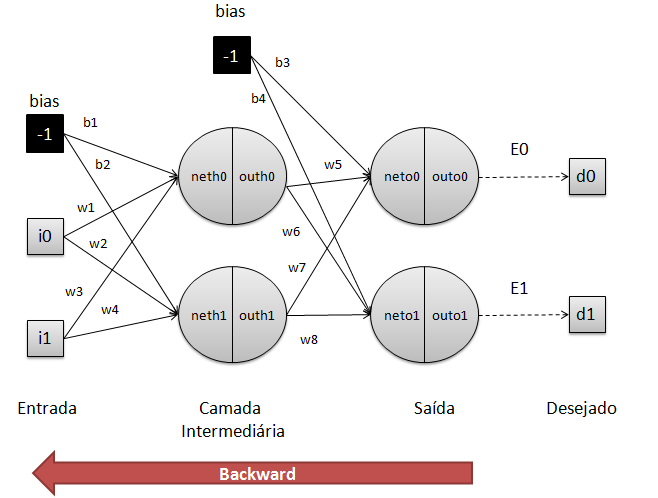

In [10]:
Image(filename="Capturar4.png")

#### 3.1 Mudança dos pesos na camada de saída

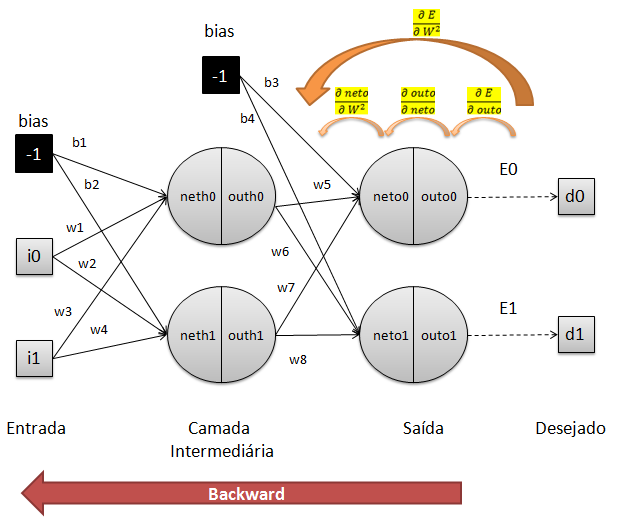

In [11]:
Image("Capturar5.png")

\begin{equation*}
\frac{\partial \mathbf{E}}{\partial \mathbf{W^2}} = \frac{\partial \mathbf{E}}{\partial \mathbf{outo}}.\frac{\partial \mathbf{outo}}{\partial \mathbf{neto}}.\frac{\partial \mathbf{neto}}{\partial \mathbf{W^2}}
\end{equation*}

Sendo,

\begin{equation*}
\frac{\partial \mathbf{E}}{\partial \mathbf{outo0}}=-(\mathbf{d}-\mathbf{outo})
\end{equation*}

\begin{equation*}
\frac{\partial \mathbf{E}}{\partial \mathbf{outo0}}=\begin{vmatrix}
\ outo0-d0 \\
\ outo1-d1 \\
\end{vmatrix}
\end{equation*}

In [91]:
dE_douto=-(d-outo)
print('O valor é:')
dE_douto

O valor é:


,0
0,0.741365
1,-0.217072


\begin{equation*}
\frac{\partial \mathbf{outo}}{\partial \mathbf{neto}}=\begin{vmatrix}
\ f'(neto0) \\
\ f'(neto1) \\
\end{vmatrix}
\end{equation*}

**Nota**: A derivada da função sigmoide é:

\begin{equation*}
\ f'(x)=f(x)(1-f(x))
\end{equation*}

In [101]:
def derivada(x):
    return sigmoid(x)*(1-sigmoid(x))

douto_dneto=neto.apply(derivada)
print('O valor é de:')
douto_dneto

O valor é de:


,0
0,0.186816
1,0.175510


\begin{equation*}
\mathbf{\delta^1}=\frac{\partial \mathbf{E}}{\partial \mathbf{outo}}.\frac{\partial \mathbf{outo}}{\partial \mathbf{neto}}
\end{equation*}

\begin{equation*}
\mathbf{\delta^1}=\begin{vmatrix}
\ outo0-d0 \\
\ outo1-d1 \\
\end{vmatrix}.\begin{vmatrix}
\ f'(neto0) \\
\ f'(neto1) \\
\end{vmatrix}=\begin{vmatrix}
\ (outo0-d0).f'(neto0)\\
\ (outo1-d1).f'(neto1)\\
\end{vmatrix}
\end{equation*}

\begin{equation*}
\mathbf{\delta^1}=\begin{vmatrix}
\delta_0^1\\
\delta_1^1 \\
\end{vmatrix}
\end{equation*}

In [93]:
delta1=dE_douto*douto_dneto
print('Com valor é de:')
delta1

Com valor é de:


,0
0,0.138499
1,-0.038098


\begin{equation*}
\frac{\partial \mathbf{neto}}{\partial \mathbf{W^2}}= \mathbf{outh^T}=\begin{vmatrix}
\ bias & outh0 & outh1 \\
\end{vmatrix}
\end{equation*}

In [94]:
dneto_dW2=outh.T
print('Com valor de:')
dneto_dW2

Com valor de:


,0,1,2
0,1.0,0.59327,0.596884


\begin{equation*}
\frac{\partial \mathbf{E}}{\partial \mathbf{W^2}}= \mathbf{\delta^1} \times \frac{\partial \mathbf{neto}}{\partial \mathbf{W^2}}
\end{equation*}

\begin{equation*}
\frac{\partial \mathbf{E}}{\partial \mathbf{W^2}}=\begin{vmatrix}
\delta_0^1 \\
\delta_1^1 \\
\end{vmatrix} \times \begin{vmatrix}
\ bias & outh0 & outh1 \\
\end{vmatrix}=\begin{vmatrix}
\delta_0^1.bias & \delta_0^1.outh0 & \delta_0^1.outh1 \\
\delta_1^1.bias & \delta_1^1.outh0 & \delta_1^1.outh1 \\
\end{vmatrix}
\end{equation*}

\begin{equation*}
\frac{\partial \mathbf{E}}{\partial \mathbf{W^2}}=\begin{vmatrix}
\frac{\partial \mathbf{E}}{\partial b3} & \frac{\partial \mathbf{E}}{\partial w5} & \frac{\partial \mathbf{E}}{\partial w7}\\
\frac{\partial \mathbf{E}}{\partial b4} & \frac{\partial \mathbf{E}}{\partial w6} & \frac{\partial \mathbf{E}}{\partial w8}\\
\end{vmatrix}
\end{equation*}

In [95]:
valor=np.dot(delta1,dneto_dW2)
dE_dW2=pd.DataFrame(valor)
print('Com valor de:')
dE_dW2

Com valor de:


,0,1,2
0,0.138499,0.082167,0.082668
1,-0.038098,-0.022603,-0.022740


Por fim, a atualização dos pesos W2 se dá:

\begin{equation*}
\mathbf{W_{novo}^2}=\mathbf{W^2}-\eta.\frac{\partial \mathbf{E}}{\partial \mathbf{W^2}}
\end{equation*}

\begin{equation*}
\mathbf{W_{novo}^2}=\begin{vmatrix}
\ b3 & w5 & w7 \\
\ b4 & w6 & w8 \\
\end{vmatrix} -\eta.\begin{vmatrix}
\frac{\partial \mathbf{E}}{\partial b3} & \frac{\partial \mathbf{E}}{\partial w5} & \frac{\partial \mathbf{E}}{\partial w7}\\
\frac{\partial \mathbf{E}}{\partial b4} & \frac{\partial \mathbf{E}}{\partial w6} & \frac{\partial \mathbf{E}}{\partial w8}\\
\end{vmatrix}
\end{equation*}

\begin{equation*}
\mathbf{W_{novo}^2}=\begin{vmatrix}
\ b3_{novo} & w5_{novo} & w7_{novo} \\
\ b4_{novo} & w6_{novo} & w8_{novo} \\
\end{vmatrix}
\end{equation*}

In [96]:
n=0.5                              # Taxa de Aprendizado               
W2_novo=W2-n*dE_dW2                # Atualização do W2
print('O novo peso W2 é:')
W2_novo

O novo peso W2 é:


,0,1,2
0,0.530751,0.358916,0.408666
1,0.619049,0.511301,0.561370


#### 3.2 Mudança dos pesos na camada intermediária

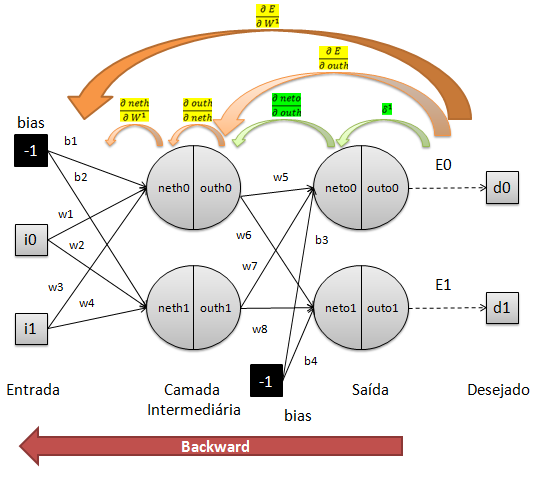

In [153]:
Image("Capturar6.png")

\begin{equation*}
\frac{\partial \mathbf{E}}{\partial \mathbf{W^1}} = \frac{\partial \mathbf{E}}{\partial \mathbf{outh}}.\frac{\partial \mathbf{outh}}{\partial \mathbf{neth}}.\frac{\partial \mathbf{neth}}{\partial \mathbf{W^1}}
\end{equation*}

Sendo, 

\begin{equation*}
\frac{\partial \mathbf{E}}{\partial \mathbf{outh}}=\mathbf{(\delta^1)^T} \times \frac{\partial \mathbf{neto}}{\partial \mathbf{outh}}=\mathbf{(\delta^1)^T} \times \mathbf{W^2}
\end{equation*}

\begin{equation*}
\frac{\partial \mathbf{E}}{\partial \mathbf{outh}}=\begin{vmatrix}
\delta_0^1 & \delta_1^1 \\
\end{vmatrix} \times \begin{vmatrix}
\ w5 & w7 \\
\ w6 & w8 \\
\end{vmatrix}=\begin{vmatrix}
\delta_0^1.w5 + \delta_1^1.w6 & \delta_0^1.w7 + \delta_1^1.w8 \\
\end{vmatrix}
\end{equation*}

In [130]:
W2_sem_bias=W2.drop([0],axis=1)
print('O peso W2 sem os pesos dos bias:')
W2_sem_bias

O peso W2 sem os pesos dos bias:


,1,2
0,0.4,0.45
1,0.5,0.55


In [131]:
valor=np.dot(delta1.T,W2_sem_bias)
dE_douth=pd.DataFrame(valor)
print('Com valor de:')
dE_douth

Com valor de:


,0,1
0,0.03635,0.04137


\begin{equation*}
\frac{\partial \mathbf{outh}}{\partial \mathbf{neth}}=\begin{vmatrix}
\ f'(neth0) \\
\ f'(neth1) \\
\end{vmatrix}
\end{equation*}

In [132]:
douth_dneth=neth.apply(derivada)
print('O valor é de:')
douth_dneth

O valor é de:


,0
0,0.241301
1,0.240613


\begin{equation*}
\mathbf{\delta^2}=\frac{\partial \mathbf{E}}{\partial \mathbf{outh}}^\mathbf{T}.\frac{\partial \mathbf{outh}}{\partial \mathbf{neth}}
\end{equation*}

\begin{equation*}
\mathbf{\delta^2}=\begin{vmatrix}
\delta_0^1.w5 + \delta_1^1.w6 \\
\delta_0^1.w7 + \delta_1^1.w8 \\
\end{vmatrix}.\begin{vmatrix}
\ f'(neth0) \\
\ f'(neth1) \\
\end{vmatrix}=\begin{vmatrix}
\ (\delta_0^1.w5 + \delta_1^1.w6).f'(neth0)\\
\ (\delta_0^1.w7 + \delta_1^1.w8).f'(neth1)\\
\end{vmatrix}
\end{equation*}

\begin{equation*}
\mathbf{\delta^2}=\begin{vmatrix}
\delta_0^2\\
\delta_1^2 \\
\end{vmatrix}
\end{equation*}

In [133]:
delta2=dE_douth.T*douth_dneth
print('Com valor é de:')
delta2

Com valor é de:


,0
0,0.008771
1,0.009954


\begin{equation*}
\frac{\partial \mathbf{neth}}{\partial \mathbf{W^1}}=\mathbf{Input^T}=\begin{vmatrix}
\ bias & i0 & i1 \\
\end{vmatrix}
\end{equation*}

In [104]:
dneth_dW1=Input.T
print('Com valor de:')
dneth_dW1

Com valor de:


,0,1,2
0,1.0,0.05,0.1


\begin{equation*}
\frac{\partial \mathbf{E}}{\partial \mathbf{W^1}}=\mathbf{\delta^2} \times \frac{\partial \mathbf{neth}}{\partial \mathbf{W^1}}
\end{equation*}

\begin{equation*}
\frac{\partial \mathbf{E}}{\partial \mathbf{W^1}}=\begin{vmatrix}
\delta_0^2 \\
\delta_1^2 \\
\end{vmatrix} \times \begin{vmatrix}
\ bias & i0 & i1 \\
\end{vmatrix}=\begin{vmatrix}
\delta_0^2.bias & \delta_0^2.i0 & \delta_0^2.i1 \\
\delta_1^2.bias & \delta_1^2.i0 & \delta_1^2.i1 \\
\end{vmatrix}
\end{equation*}

\begin{equation*}
\frac{\partial \mathbf{E}}{\partial \mathbf{W^1}}=\begin{vmatrix}
\frac{\partial \mathbf{E}}{\partial b1} & \frac{\partial \mathbf{E}}{\partial w1} & \frac{\partial \mathbf{E}}{\partial w3}\\
\frac{\partial \mathbf{E}}{\partial b2} & \frac{\partial \mathbf{E}}{\partial w2} & \frac{\partial \mathbf{E}}{\partial w4}\\
\end{vmatrix}
\end{equation*}

In [134]:
valor=np.dot(delta2,dneth_dW1)
dE_dW1=pd.DataFrame(valor)
print('Com valor de:')
dE_dW1

Com valor de:


,0,1,2
0,0.008771,0.000439,0.000877
1,0.009954,0.000498,0.000995


Por fim, a atualização dos pesos W1 se dá:

\begin{equation*}
\mathbf{W_{novo}^1}=\mathbf{W^1}-\eta.\frac{\partial \mathbf{E}}{\partial \mathbf{W^1}}
\end{equation*}

\begin{equation*}
\mathbf{W_{novo}^1}=\begin{vmatrix}
\ b1 & w1 & w2 \\
\ b2 & w2 & w4 \\
\end{vmatrix} -\eta.\begin{vmatrix}
\frac{\partial \mathbf{E}}{\partial b1} & \frac{\partial \mathbf{E}}{\partial w1} & \frac{\partial \mathbf{E}}{\partial w3}\\
\frac{\partial \mathbf{E}}{\partial b2} & \frac{\partial \mathbf{E}}{\partial w2} & \frac{\partial \mathbf{E}}{\partial w4}\\
\end{vmatrix}
\end{equation*}

\begin{equation*}
\mathbf{W_{novo}^1}=\begin{vmatrix}
\ b1_{novo} & w1_{novo} & w3_{novo} \\
\ b2_{novo} & w2_{novo} & w4_{novo} \\
\end{vmatrix}
\end{equation*}

In [135]:
n=0.5                              # Taxa de Aprendizado               
W1_novo=W1-n*dE_dW1                # Atualização do W1
print('O novo peso W1 é:')
W1_novo

O novo peso W1 é:


,0,1,2
0,0.345614,0.149781,0.199561
1,0.345023,0.249751,0.299502
